In [1]:
import numpy as np 
import numpy.ma as ma
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import datetime

from tqdm import tqdm



import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits
import glob
import pandas as pd
from astropy.table import Table



matplotlib.rcParams.update({'xtick.labelsize':18,
                            'ytick.labelsize':18,
                            'axes.titlesize':18,
                            'axes.labelsize':18,
                            'font.size':18,
                            'xtick.top':True,
                            'xtick.minor.visible':True,
                            'ytick.minor.visible':True,
                            'xtick.major.size':4,
                            'xtick.minor.size':2,
                            'ytick.major.size':4,
                            'ytick.minor.size':2,
                            'ytick.right':True,
                            'xtick.direction':'in',
                            'ytick.direction':'in',
                            'font.family':'serif'})

flags = ['BADPIX',
'CRPIX',
'SATPIX',
'UNFIXABLE',
'BADDARK',
'BADFLAT',
'BADERR',
'NOSKY',
'LITTROW_GHOST',
'PERSIST_HIGH',
'PERSIST_MED',
'PERSIST_LOW',
'SIG_SKYLINE',
'SIG_TELLURIC']


from TolColors import tol_cmap
cmap = tol_cmap('rainbow_PuRd')
cmap_diverge = tol_cmap('sunset')

In [38]:
hdulist = fits.open('ResidualsFiles/CACLOUD/CA_TEST_Residuals.fits')

In [139]:
def getwavs_(hdu):
    header = hdu.header
    CRVAL1 = header['CRVAL1']
    CDELT1 = header['CDELT1']
    wavs = np.power(10, CRVAL1 + CDELT1 * np.arange(len(hdu.data[0,:])))
    return wavs 

In [39]:
teff_bins = np.concatenate([np.arange(3000, 5000, 250), np.arange(5000,10000, 500), [10000]]) # or whatever
logg_bins = np.arange(-1, 5.1, 0.5)
m_h_bins = np.concatenate([np.arange(-2.5, 1.0, .3), [1]])
print(len(teff_bins), len(logg_bins), len(m_h_bins))
print((len(teff_bins)-1) * (len(logg_bins)-1) * (len(m_h_bins)-1))
print(len(hdulist[1:]))

19 13 13
2592
2592


In [40]:
hdus = np.array(hdulist[1:]).reshape(18, 12,12):

In [83]:
def match_residual(teff, logg, m_h):
    teff_bins = np.concatenate([np.arange(3000, 5000, 250), np.arange(5000,10000, 500), [10000]]) # or whatever
    logg_bins = np.arange(-1, 5.1, 0.5)
    m_h_bins = np.concatenate([np.arange(-2.5, 1.0, .3), [1]])

    i = np.searchsorted(teff_bins, teff)
    j = np.searchsorted(logg_bins, logg)
    k = np.searchsorted(m_h_bins, m_h)
    
    return hdus[i,j,k]

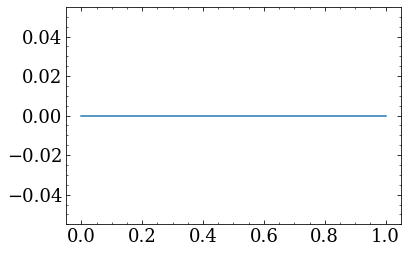

In [89]:
plt.plot(match_residual(6000,4, 0.015).data[:,0])
plt.show()

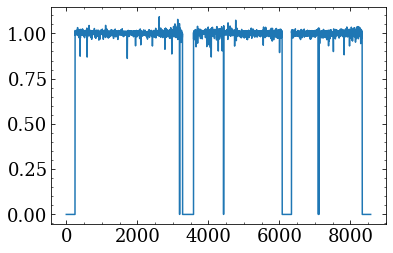

In [96]:
plt.plot(match_residual(5000, 4, 0.015).data[0,:])
plt.show()

In [122]:
testfile = fits.open('ResidualsFiles/Residuals_teffbin3250-3300.fits')
testfile = np.array(testfile[1:]).reshape(30, 12)


def match(hdulist, logg, m_h):
    logg_bins = np.arange(-1, 5.2, 0.2)
    m_h_bins = np.concatenate([np.arange(-2.3, -1.1, 0.3), np.arange(-1.1, 0.5, 0.2), [0.5]])
    j = np.searchsorted(logg_bins, logg)
    k = np.searchsorted(m_h_bins, m_h)
    
    return hdulist[j,k]

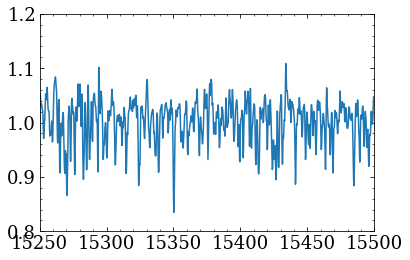

In [144]:
def plot_residual(hdu):
    fig, ax = plt.subplots(1,1)
    residual = hdu.data[0,:]
    lmbda = getwavs_(hdu)
    ax.plot(lmbda, residual)
    ax.set_ylim(0.8, 1.2)
    ax.set_xlim(15250, 15500)
    ax.set_xlim()
    plt.show()
    
hduu = match(testfile, 0.4, 0.1)
plot_residual(hduu)

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8575                                                  
NAXIS2  =                    2                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
NBIN    =                   40                                                  
TMIN    =                 3250                                                  
TMAX    =                 3300                                                  
GMIN    =   0.5999999999999996                                                  
GMAX    =   0.7999999999999996                                                  
MMIN    =   0.29999999999999